<a href="https://colab.research.google.com/github/Al-goritmus/hunty_project/blob/master/EDA_vacantes_xlsx_Sheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
!pip install sweetviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot     as plt
import matplotlib.patches    as mpatches
import seaborn               as sns
import sweetviz as sv
import sklearn.metrics       as Metrics
from google.colab import drive
%matplotlib inline

# Read file

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_dir = '/content/drive/MyDrive/hunty/'
filename = 'vacantes.xlsx'
sheet = 'Sheet1'


In [ ]:
df = pd.read_excel(f'{path_dir}{filename}', sheet_name=sheet, header=0)

In [ ]:
df

,account executive,area,work_modality,country,city,remote,vacancy_name,description
0,NaN,Ventas Comercial,Tiempo completo,MEXICO,Ciudad de Mexico,False,account executive,Are you looking for a challenging opportunity ...
1,50476.0,Mercadeo,Tiempo completo,MEXICO,San Pedro Garza Garcia,False,coordinador de marketing y publicidad,Empresa enfocada en estética médica y dermatol...
2,35784.0,Ventas Comercial,NaN,,NaN,False,Ejecutivo de Ventas y Servicio Medellín - 02 d...,Sobre el cargo\nEstamos en la búsqueda de WOMe...
3,55829.0,Mercadeo,Tiempo completo,NaN,NaN,False,desarrollador web,"Gen TI Consulting Somos una empresa mexicana, ..."
4,31068.0,Ventas Comercial,Tiempo completo,COLOMBIA,Medellin,False,asesor comercial con experiencia en ventas de ...,Tienda De Marca Deportiva Número 1 a Nivel Mu...
...,...,...,...,...,...,...,...,...
9995,35850.0,Ventas Comercial,NaN,NaN,NaN,False,COLOMBIA - Coordinador Senior COE,Reporta a: COE Manager\nLinio es la tienda en ...
9996,56434.0,Mercadeo,Tiempo completo,NaN,NaN,True,"manager, digital marketing","position title: manager, digital marketing\n\n..."
9997,478.0,NaN,Tiempo completo,NaN,NaN,False,director de nuevos negocios,importante empresa del sectorrequieredirector ...
9998,65986.0,Recursos Humanos,Tiempo completo,NaN,NaN,True,sr recruiter - mexico,location: 100% remotee in mexico – proficient ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account executive  9999 non-null   float64
 1   area               7461 non-null   object 
 2   work_modality      9560 non-null   object 
 3   country            6530 non-null   object 
 4   city               6529 non-null   object 
 5   remote             10000 non-null  bool   
 6   vacancy_name       10000 non-null  object 
 7   description        10000 non-null  object 
dtypes: bool(1), float64(1), object(6)
memory usage: 556.8+ KB


In [ ]:
df.shape

(10000, 8)

In [ ]:
df.dropna()


,account executive,area,work_modality,country,city,remote,vacancy_name,description
1,50476.0,Mercadeo,Tiempo completo,MEXICO,San Pedro Garza Garcia,False,coordinador de marketing y publicidad,Empresa enfocada en estética médica y dermatol...
4,31068.0,Ventas Comercial,Tiempo completo,COLOMBIA,Medellin,False,asesor comercial con experiencia en ventas de ...,Tienda De Marca Deportiva Número 1 a Nivel Mu...
6,40686.0,Ventas Comercial,Tiempo completo,MEXICO,Ciudad de Mexico,True,"senior director, mesoamerica",the rainforest alliance is creating a more sus...
9,58837.0,Mercadeo,Tiempo completo,MEXICO,Cuautitlan,False,trade marketing coordinator,Coordinador Trade Marketing\n\nTiempo Completo...
10,53382.0,Mercadeo,Tiempo completo,UNITED STATES,Wescosville,True,category manager,"location: hanover, pa (logistic ctr), pennsylv..."
...,...,...,...,...,...,...,...,...
9986,57179.0,Mercadeo,Tiempo completo,MEXICO,Ciudad de Mexico,True,marketing automation specialist,latam marketing automation specialist\n\n\n\n\...
9987,29005.0,Ventas Comercial,Tiempo completo,COLOMBIA,Valledupar,False,coordinador comercial - valledupar,Importante empresa del sector de telecomunicac...
9989,34240.0,Ventas Comercial,Tiempo completo,COLOMBIA,Bogota,False,asesora ventas,"somos thax diseñadores, nuestras tiendas reuni..."
9993,31369.0,Ventas Comercial,Tiempo completo,COLOMBIA,Bogota,False,asesor comercial montblanc,Sobre la empresa\n\n\n\n\nComercio al por meno...


# Normalize_cols

In [ ]:
def remove_accents_cols(df_cols):
    return df_cols.str.replace('ñ','ni').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
def remove_special_chars(df_cols):
    return df_cols.str.replace(r'[$@&/.:-]',' ', regex=True)
def regular_camel_case(snake_str):
    components = snake_str.split('_')
    return components[0] + ''.join(x.title() for x in components[1:])
def regular_snake_case(df_cols):
    cols = df_cols.str.replace('ñ','ni')
    cols = cols.str.lower().str.replace('/',' ').str.replace('.',' ').str.strip()
    cols = cols.str.replace(r'\s+',' ',regex=True)
    cols = cols.str.replace(' ','_')
    return cols

In [ ]:
df.columns = remove_accents_cols(df.columns)
df.columns = remove_special_chars(df.columns)
df.columns = regular_snake_case(df.columns)

<ipython-input-108-9b778f042fff>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cols = cols.str.lower().str.replace('/',' ').str.replace('.',' ').str.strip()


In [ ]:
df

,account_executive,area,work_modality,country,city,remote,vacancy_name,description
0,NaN,Ventas Comercial,Tiempo completo,MEXICO,Ciudad de Mexico,False,account executive,Are you looking for a challenging opportunity ...
1,50476.0,Mercadeo,Tiempo completo,MEXICO,San Pedro Garza Garcia,False,coordinador de marketing y publicidad,Empresa enfocada en estética médica y dermatol...
2,35784.0,Ventas Comercial,NaN,,NaN,False,Ejecutivo de Ventas y Servicio Medellín - 02 d...,Sobre el cargo\nEstamos en la búsqueda de WOMe...
3,55829.0,Mercadeo,Tiempo completo,NaN,NaN,False,desarrollador web,"Gen TI Consulting Somos una empresa mexicana, ..."
4,31068.0,Ventas Comercial,Tiempo completo,COLOMBIA,Medellin,False,asesor comercial con experiencia en ventas de ...,Tienda De Marca Deportiva Número 1 a Nivel Mu...
...,...,...,...,...,...,...,...,...
9995,35850.0,Ventas Comercial,NaN,NaN,NaN,False,COLOMBIA - Coordinador Senior COE,Reporta a: COE Manager\nLinio es la tienda en ...
9996,56434.0,Mercadeo,Tiempo completo,NaN,NaN,True,"manager, digital marketing","position title: manager, digital marketing\n\n..."
9997,478.0,NaN,Tiempo completo,NaN,NaN,False,director de nuevos negocios,importante empresa del sectorrequieredirector ...
9998,65986.0,Recursos Humanos,Tiempo completo,NaN,NaN,True,sr recruiter - mexico,location: 100% remotee in mexico – proficient ...


# General stats cells

In [ ]:
df.describe()

,account_executive
count,9999.000000
mean,37137.348235
std,18077.717733
min,5.000000
25%,23967.500000
50%,38651.000000
75%,52177.000000
max,65989.000000


In [ ]:
df.dtypes


account_executive    float64
area                  object
work_modality         object
country               object
city                  object
remote                  bool
vacancy_name          object
description           object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account_executive  9999 non-null   float64
 1   area               7461 non-null   object 
 2   work_modality      9560 non-null   object 
 3   country            6530 non-null   object 
 4   city               6529 non-null   object 
 5   remote             10000 non-null  bool   
 6   vacancy_name       10000 non-null  object 
 7   description        10000 non-null  object 
dtypes: bool(1), float64(1), object(6)
memory usage: 556.8+ KB


In [ ]:
print('recuento de columnas por tipo: ', df.dtypes.value_counts())
print('sumatoria de valores nulos en el dataframe: ', df.isna().sum())

recuento de columnas por tipo:  object     6
float64    1
bool       1
dtype: int64
sumatoria de valores nulos en el dataframe:  account_executive       1
area                 2539
work_modality         440
country              3470
city                 3471
remote                  0
vacancy_name            0
description             0
dtype: int64


# General Analyst by columns

## account_executive
type: float64

In [ ]:
df['account_executive'] = pd.to_numeric(df[f'account_executive'], errors='coerce')

In [ ]:
df.account_executive.nunique()

9999

## area
type: object

In [ ]:
df['area'] = df['area'].astype(str)
df['area'] = df['area'].str.replace('.0','')
df['area'].unique()

<ipython-input-117-c3d5cb09d4b9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['area'] = df['area'].str.replace('.0','')


array(['Ventas Comercial', 'Mercadeo', 'nan', 'Recursos Humanos'],
      dtype=object)

In [ ]:
df['area'].value_counts()

Ventas Comercial    4192
Mercadeo            2555
nan                 2539
Recursos Humanos     714
Name: area, dtype: int64

<Axes: ylabel='area'>

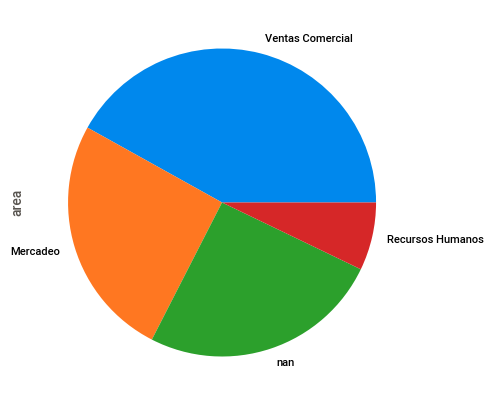

In [ ]:
plt.figure(figsize=(10,5))
df['area'].value_counts()[:15].plot(kind='pie')

<Axes: >

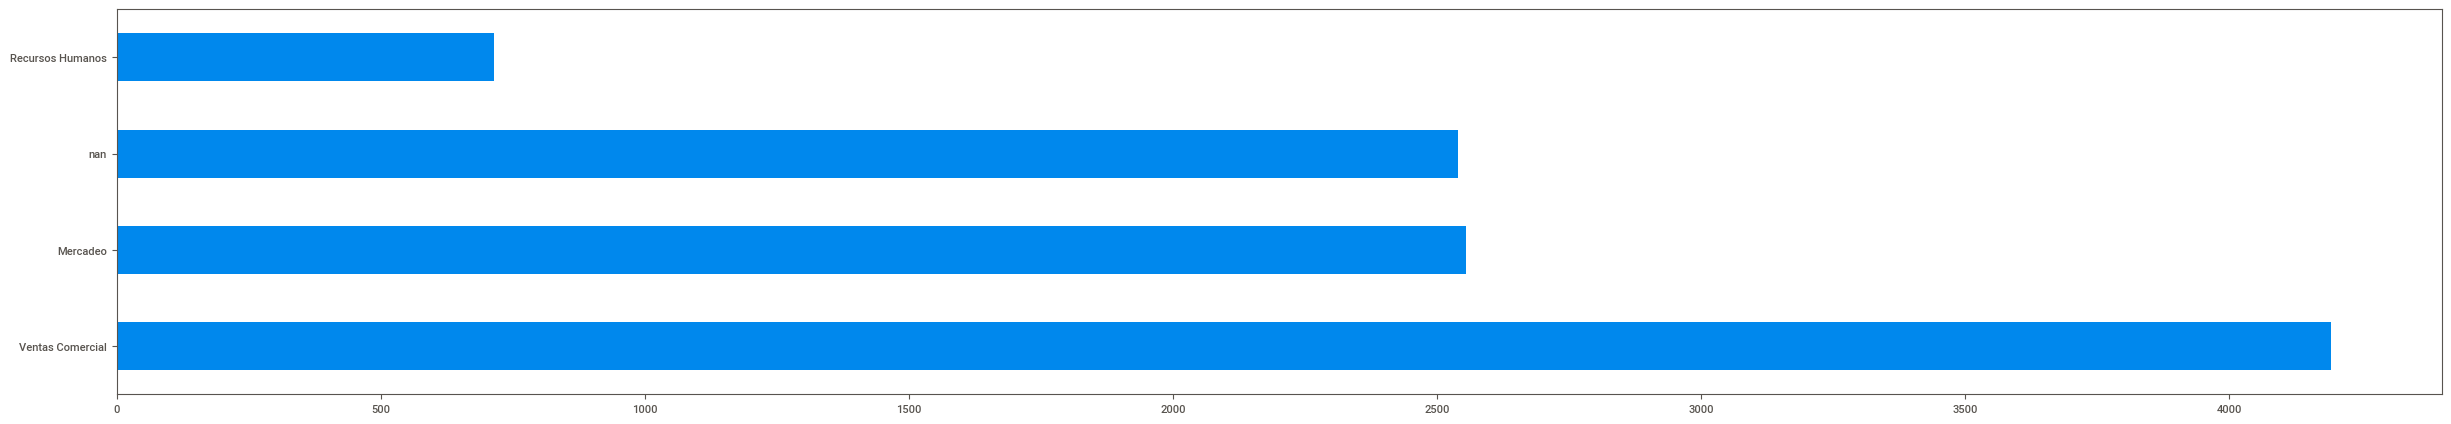

In [ ]:
plt.figure(figsize=(30,5))
df['area'].value_counts()[:15].plot(kind='barh')

## work_modality
type: object

In [ ]:
df['work_modality'] = df['work_modality'].astype(str)
df['work_modality'] = df['work_modality'].str.replace('.0','')
df['work_modality'].unique()

<ipython-input-121-acbd8ff6ec11>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['work_modality'] = df['work_modality'].str.replace('.0','')


array(['Tiempo completo', 'nan', 'Indiferente', 'Prácticas Laborales',
       'Medio tiempo'], dtype=object)

In [ ]:
df['work_modality'].value_counts()

Tiempo completo        9193
nan                     440
Indiferente             363
Prácticas Laborales       3
Medio tiempo              1
Name: work_modality, dtype: int64

<Axes: >

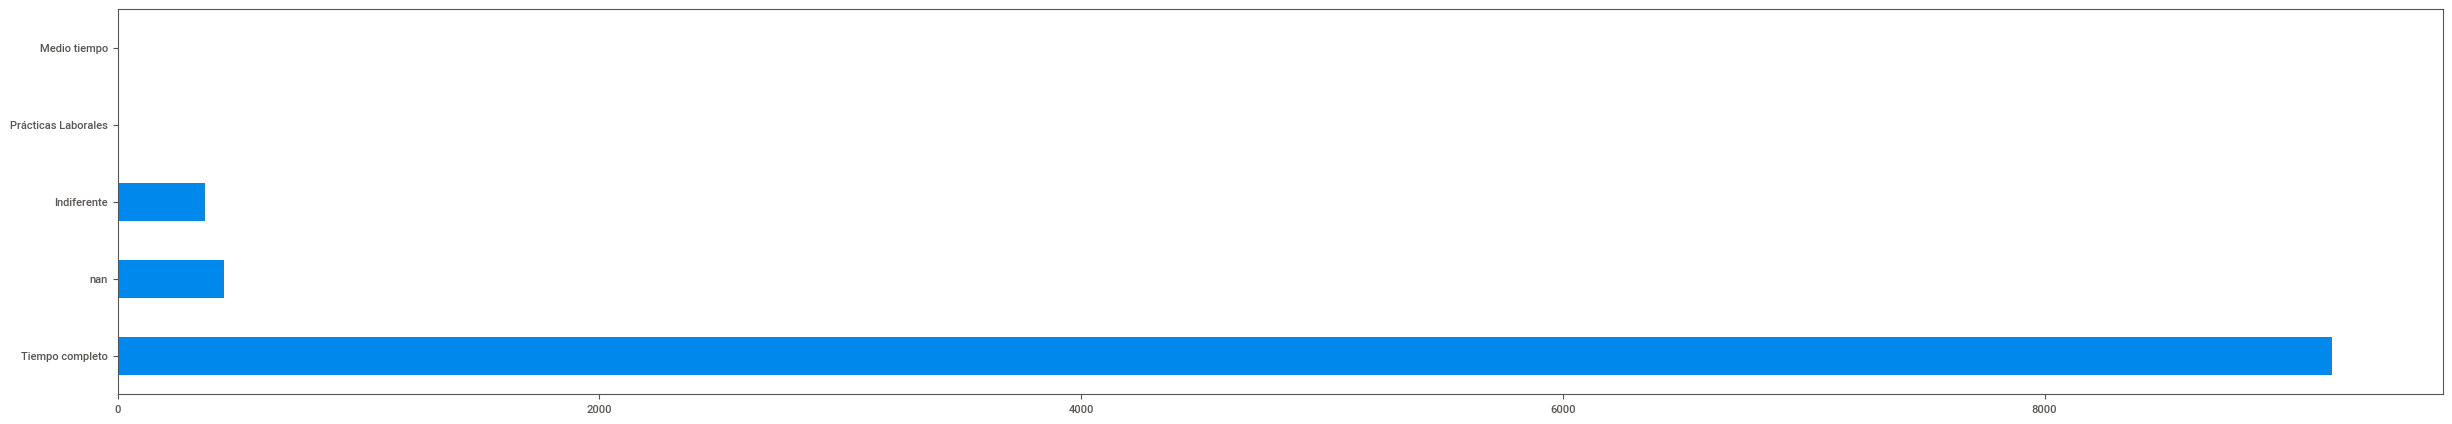

In [ ]:
plt.figure(figsize=(30,5))
df['work_modality'].value_counts()[:15].plot(kind='barh')

In [ ]:
df['work_modality'] = df['work_modality'].astype('category')


## country
type: object

In [ ]:
df['country'] = df['country'].astype(str)
df['country'] = df['country'].str.replace('.0','')
df['country'].unique()

<ipython-input-125-84115444bcd9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['country'] = df['country'].str.replace('.0','')


array(['MEXICO', ' ', 'nan', 'COLOMBIA', 'UNITED STATES', 'CHILE', 'CUBA',
       'EL SALVADOR', 'VENEZUELA', 'CANADA', 'BRAZIL', 'PERU',
       'PUERTO RICO', 'COSTA RICA', 'PANAMA', 'ECUADOR', 'NICARAGUA',
       'CAMEROON', 'DOMINICAN REPUBLIC', 'ARGENTINA', 'BELIZE', 'BERMUDA',
       'HONDURAS', 'GUATEMALA', 'URUGUAY', 'GUYANA'], dtype=object)

In [ ]:
df['country'].value_counts()

COLOMBIA              3588
nan                   3470
MEXICO                2069
UNITED STATES          359
CHILE                   84
VENEZUELA               69
CANADA                  55
BRAZIL                  51
EL SALVADOR             50
COSTA RICA              49
CAMEROON                31
PERU                    28
NICARAGUA               14
CUBA                    12
ECUADOR                 12
PANAMA                  10
DOMINICAN REPUBLIC      10
ARGENTINA               10
PUERTO RICO              9
HONDURAS                 6
BERMUDA                  4
URUGUAY                  4
BELIZE                   3
                         1
GUATEMALA                1
GUYANA                   1
Name: country, dtype: int64

<Axes: ylabel='country'>

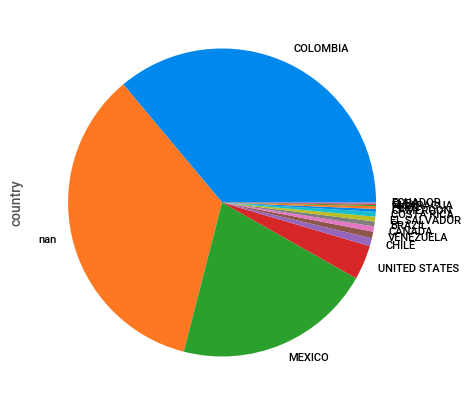

In [ ]:
plt.figure(figsize=(10,5))
df['country'].value_counts()[:15].plot(kind='pie')

<Axes: >

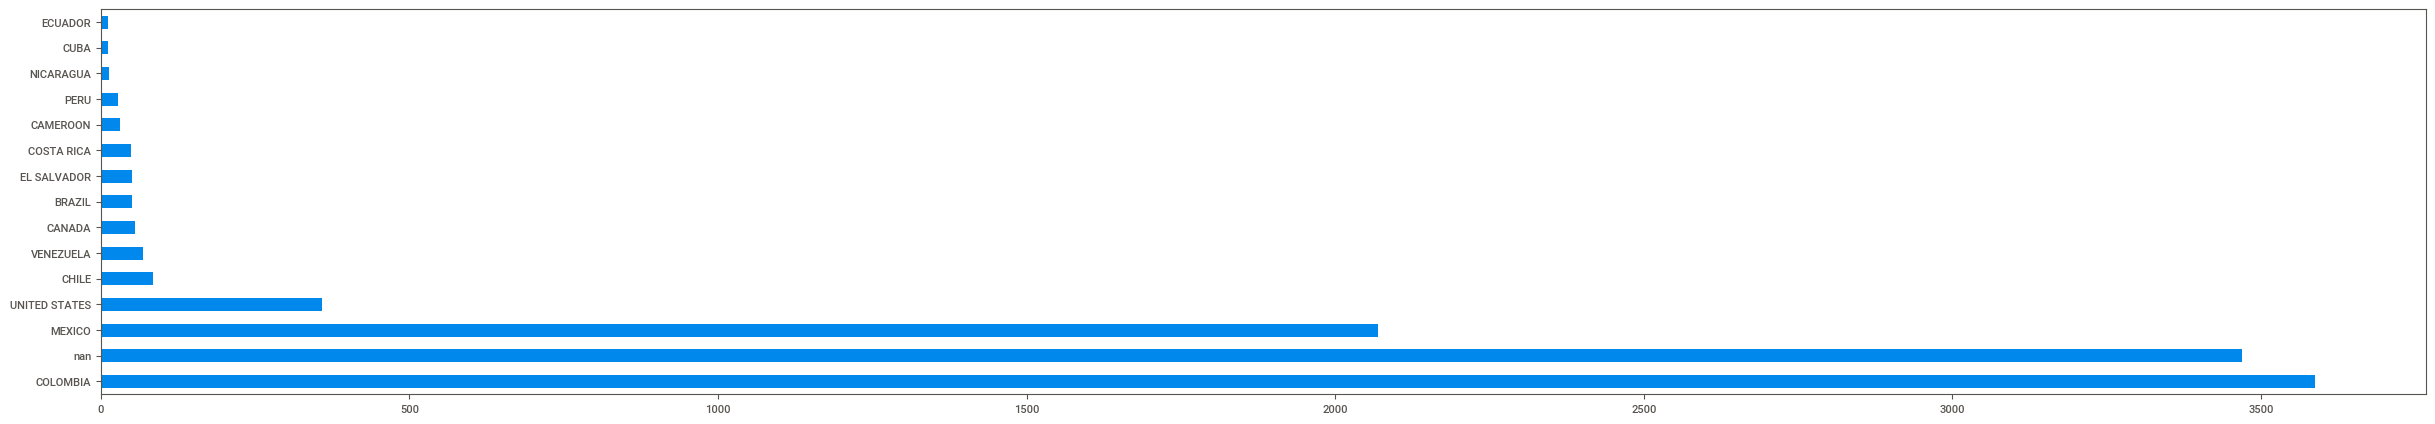

In [ ]:
plt.figure(figsize=(30,5))
df['country'].value_counts()[:15].plot(kind='barh')

## city
type: object

In [ ]:
df['city'] = df['city'].astype(str)
df['city'] = df['city'].str.replace('.0','')
df['city'].unique()

<ipython-input-129-fde3928cd42a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace('.0','')


array(['Ciudad de Mexico', 'San Pedro Garza Garcia', 'nan', 'Medellin',
       'Bogota', 'Cuautitlan', 'Wescosville', 'Monterrey', 'Funza',
       'Pereira', 'Cartagena', 'Villavicencio', 'Norman', 'Cali',
       'Florida', 'Tunja', 'Guadalajara', 'Rionegro', 'Ciudad Cuauhtemoc',
       'Chihuahua', 'Cucuta', 'Bucaramanga', 'Manizales', 'Itagui',
       'Neiva', 'Antofagasta', 'Pasto', 'Minatitlan', 'Victorville',
       'San Juan del Cesar', 'Valencia West', 'Village of Islands',
       'Floridablanca', 'Puebla', 'San Francisco', 'New York', 'Jamundi',
       'Barranquilla', 'Tampico', 'Valledupar', 'Zapopan', 'Tenjo',
       'Naucalpan de Juarez', 'Girardota', 'Ciudad Apodaca', 'Guaduas',
       'Merida', 'Envigado', 'Victoria', 'Ibague', 'Guadalupe',
       'Ecatepec', 'Tijuana', 'St. Robert', 'Monteria', 'Palmira',
       'Grand Prairie', 'Hopatcong', 'Armenia', 'Lima', 'Candelaria',
       'Santiago', 'Kennewick', 'Xico', 'Kitchener', 'Oak Grove', 'Tepic',
       'Apartado', 'Canc

In [ ]:
df['city'].value_counts().head(15)

nan                 3471
Bogota              1322
Ciudad de Mexico    1119
Medellin             712
Cali                 327
Barranquilla         218
Monterrey            184
Guadalajara          142
Bucaramanga          136
Pereira               82
Manizales             48
Villavicencio         48
Guaduas               44
Santiago              43
Puebla                43
Name: city, dtype: int64

<Axes: ylabel='city'>

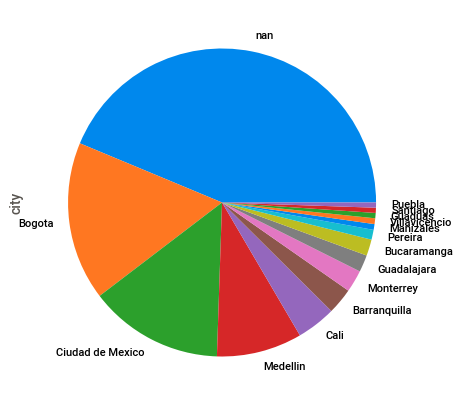

In [ ]:
plt.figure(figsize=(10,5))
df['city'].value_counts()[:15].plot(kind='pie')

<Axes: >

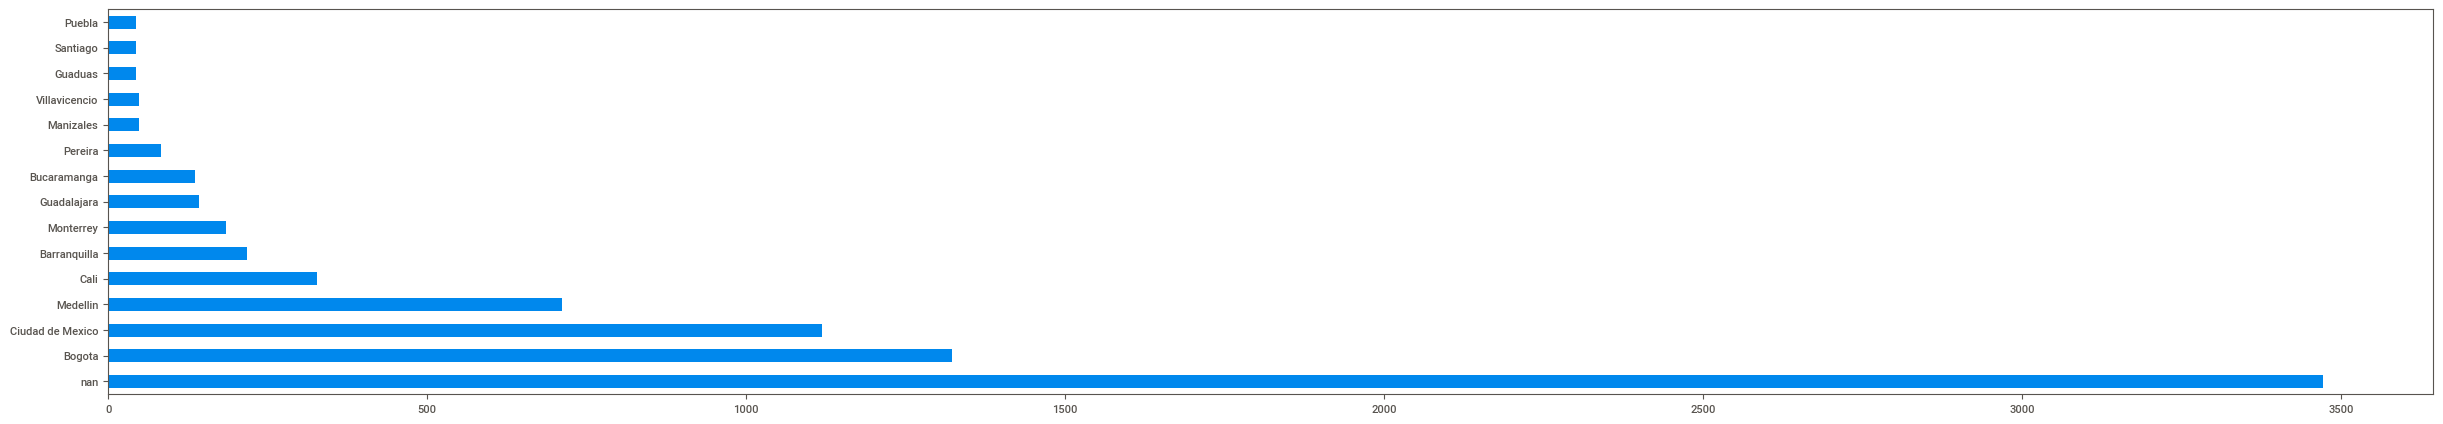

In [ ]:
plt.figure(figsize=(30,5))
df['city'].value_counts()[:15].plot(kind='barh')

## remote
type: bool

In [ ]:
df['remote'].unique()

array([False,  True])

In [ ]:
df['remote'].value_counts()

False    6514
True     3486
Name: remote, dtype: int64

<Axes: ylabel='remote'>

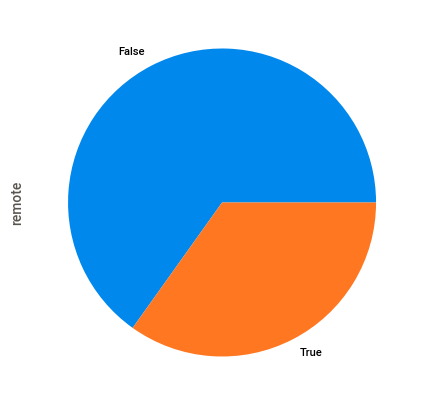

In [ ]:
plt.figure(figsize=(10,5))
df['remote'].value_counts()[:15].plot(kind='pie')

<Axes: >

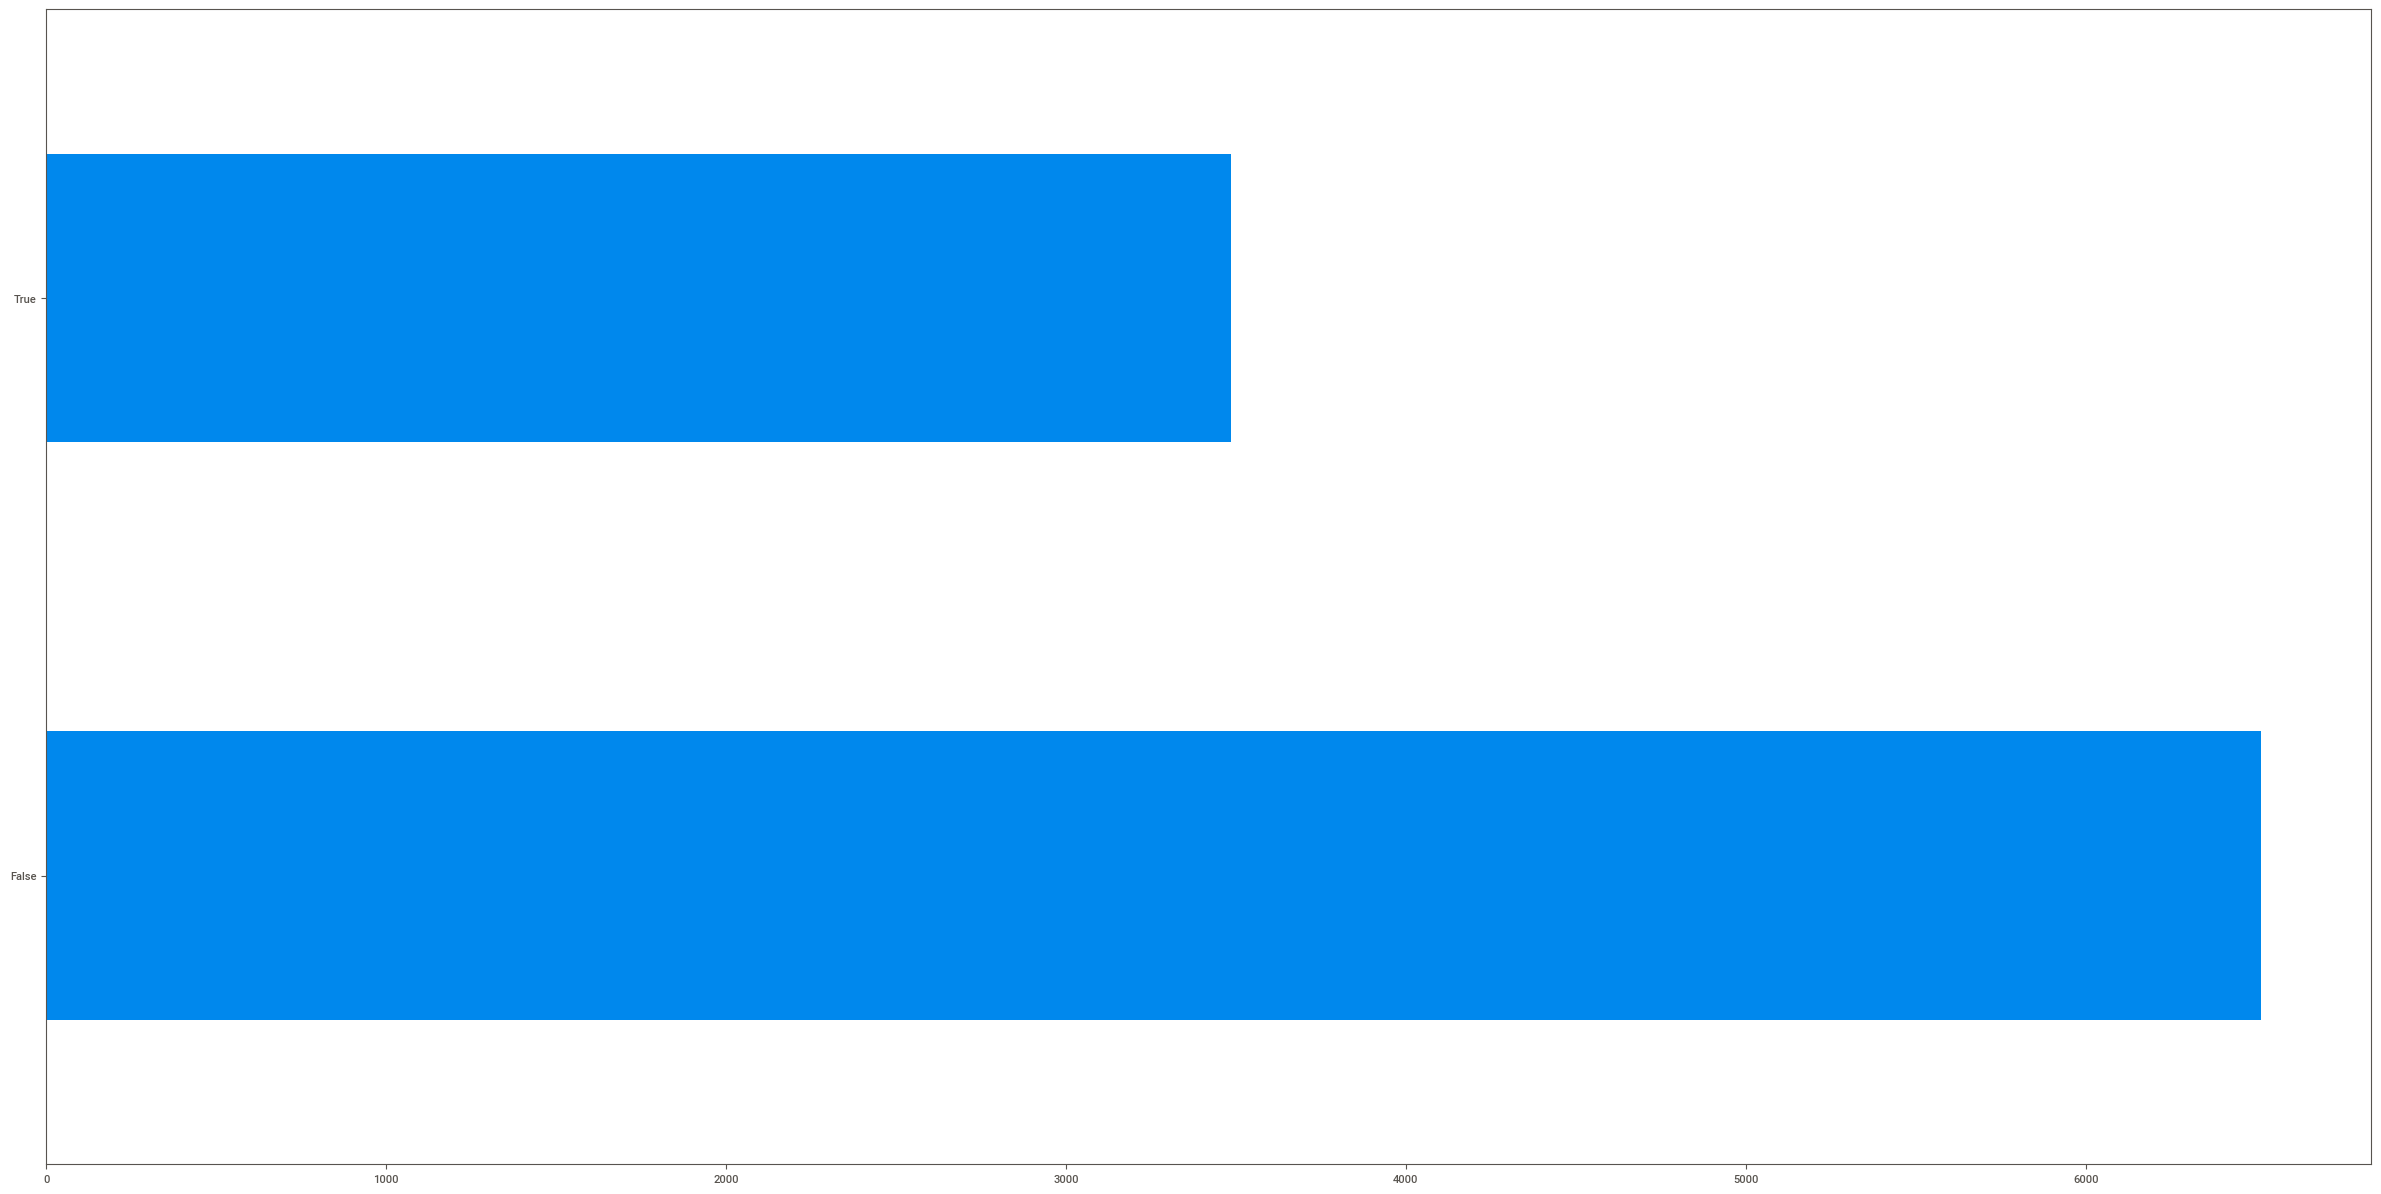

In [ ]:
plt.figure(figsize=(30,15))
df['remote'].value_counts()[:15].plot(kind='barh')

In [ ]:
df[df['remote']==True][['remote','country','city','account_executive']].groupby(['remote','country','city']).count().head(30).sort_values(by='account_executive',ascending=False)

account_executive
remote country   city                             
True   CAMEROON  Mbe                            31
       BRAZIL    Colombia                       14
       CANADA    Toronto                        12
       BRAZIL    California                      6
       CANADA    Kitchener                       5
       BERMUDA   Hamilton                        4
       CANADA    Ottawa                          4
                 Puslinch                        3
                 Quebec City                     2
                 Calgary                         2
       ARGENTINA Lincoln                         2
       CANADA    Trois-Rivieres                  2
       BRAZIL    Guadalupe                       2
       CANADA    Melfort                         1
       BRAZIL    Alexandria                      1
       CANADA    Surrey                          1
                 Saguenay                        1
       BRAZIL    Caldas                          1
                 Colorado                        1
       CANADA    Mirabel                         1
                 Amherstburg                     1
                 Burnaby                         1
                 Magog                           1
                 Lloydminster                    1
                 Leamington                      1
                 L'Epiphanie                     1
       BELIZE    San Pedro                       1
       CANADA    East Kelowna                    1
       BRAZIL    Montenegro                      1
       CANADA    Medicine Hat                    1

## vacancy_name
type: object

In [ ]:
df['vacancy_name'] = df['vacancy_name'].astype(str)
df['vacancy_name'] = df['vacancy_name'].str.replace('.0','')
df['vacancy_name'].unique()

<ipython-input-138-451b1af81087>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['vacancy_name'] = df['vacancy_name'].str.replace('.0','')


array(['account executive', 'coordinador de marketing y publicidad',
       'Ejecutivo de Ventas y Servicio Medellín -2 de Diciembre', ...,
       'director de nuevos negocios', 'sr recruiter - mexico',
       'especialista de gestión efectiva'], dtype=object)

In [ ]:
df['vacancy_name'].value_counts().head(30)

community manager                      95
asesor comercial                       59
business development manager           57
product manager                        42
business development representative    40
marketing manager                      34
consultor comercial                    30
ejecutivo comercial                    30
marketing coordinator                  27
account manager                        26
auxiliar administrativo                25
talent acquisition specialist          25
customer success manager               21
desarrollador web                      20
frontend developer                     20
business development specialist        19
sales manager                          19
marketing specialist                   18
executive assistant                    18
hr generalist                          18
analista de marketing                  18
human resources generalist             17
consultor de ventas                    17
coordinador de marketing          

<Axes: ylabel='vacancy_name'>

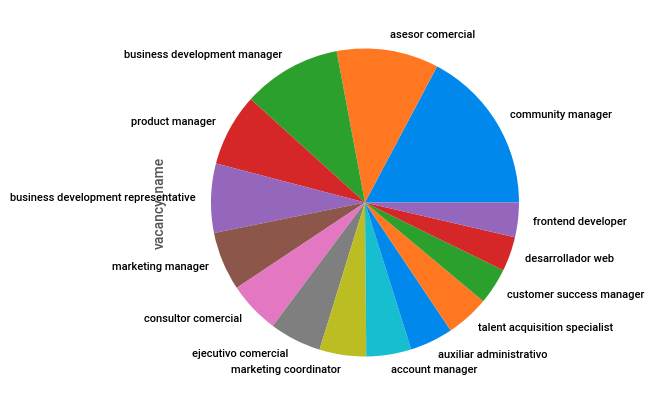

In [ ]:
plt.figure(figsize=(10,5))
df['vacancy_name'].value_counts()[:15].plot(kind='pie')

<Axes: >

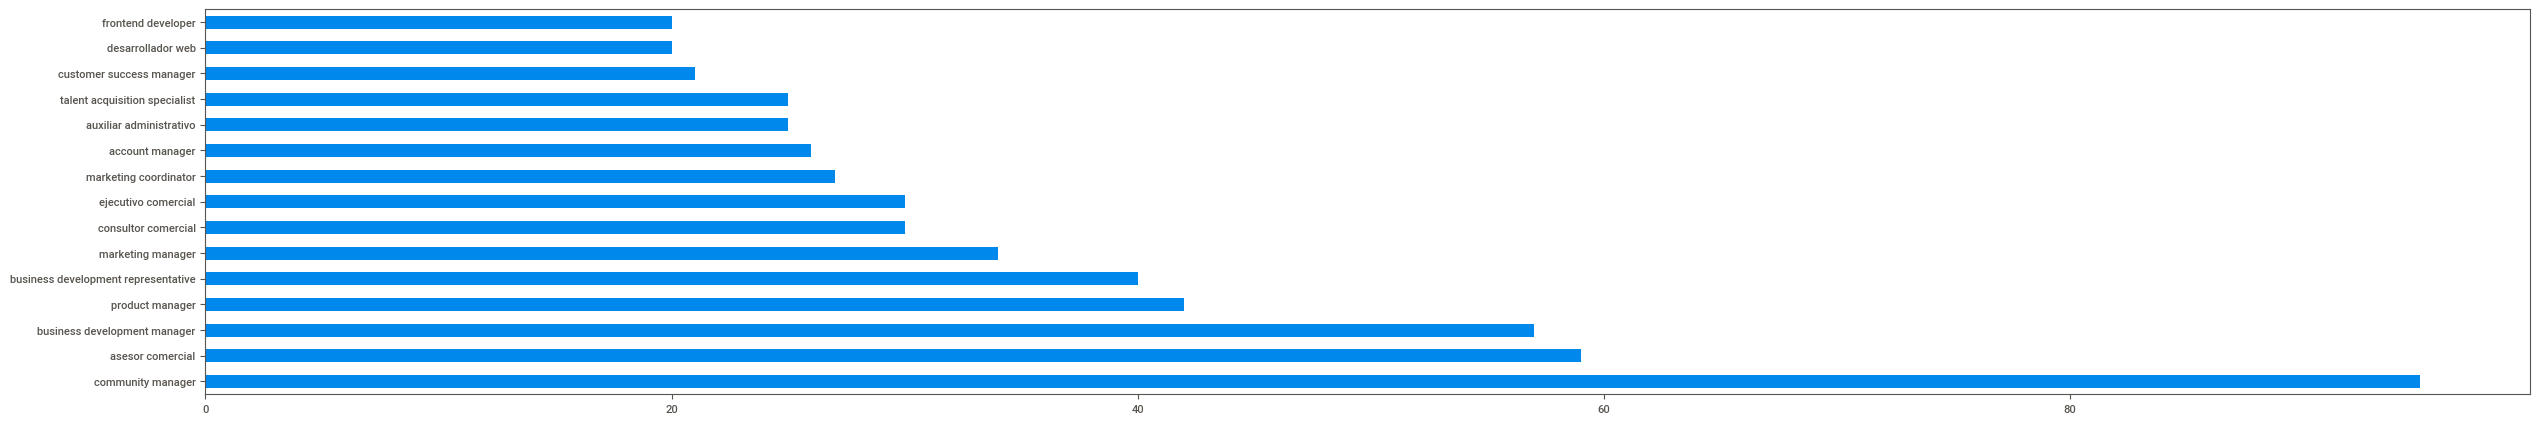

In [ ]:
plt.figure(figsize=(30,5))
df['vacancy_name'].value_counts()[:15].plot(kind='barh')

## description
type: object

In [ ]:
df['description'] = df['description'].astype(str)
df['description'] = df['description'].str.replace('.0','')
df['description'].unique()

<ipython-input-142-40cbf9d25686>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('.0','')


array(['Are you looking for a challenging opportunity in an organization with a dynamic, innovative and diverse environment?\n\n\n\n\nIf so, your future is at PepsiCo. As a world class company, we seek excellence in everything we do from the launch of a new product to its execution at the point of sale. Therefore, we need talented and innovative people who are passionate about what they do.\n\n\n\n\nPepsiCo Mexico currently has a broad portfolio of food and beverage products, such as Sabritas, Gamesa, Quaker, Pepsi, Obela and Sonrics, leading brands in the snacks, cereals, soft drinks, isotonic and cookies markets respectively.\n\nOur vision is to be the world leader in food and beverages by earning with purpose. `Winning with purpose` reflects our ambition to win sustainably in the market and integrate the purpose in all aspects of the business.\n\n\n\n\nFor more information you can enter www.pepsico.com\n\n\n\n\nNow we are looking for this position:\n\nBRAND CONTENT - ACCOUNT EXECUTI

In [ ]:
df['description'].value_counts()

Sobre el cargo\nEstamos en la búsqueda de WOMers apasionad@s por la venta de productos y servicios. Como Ejecutivo Multiskill vas a estar a cargo de la asesoría comercial, la pre-venta, la venta y la post-venta en nuestras tiendas y kioskos.\nPara postularte a esta vacante es indispensable que cuentes con:\n1-2 años en experiencia en ventas.\nGrado culminado de Técnico o Tecnólogo en carreras administrativas, comunicación o afines.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

# Sweetviz report

In [ ]:
sweet_report = sv.analyze(df)
sweet_report.show_html(f'{path_dir}sw_report_vacantes.xlsx_Sheet1.html')

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:1

Report /content/drive/MyDrive/hunty/sw_report_vacantes.xlsx_Sheet1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
